In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S3/Office_Conrad-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),12):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+12, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (478, 24, 1)
y_train.shape =  (478, 12)
X_test.shape =  (58, 24, 1)
y_test.shape =  (58, 12)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(12))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 12)                300       
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
4/4 [==============================] - 1s 8ms/step - loss: 92.9025
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 90.4576
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 88.0575
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 85.7491
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 83.5468
Epoch 6/300
4/4 [==============================] - 0s 8ms/step - loss: 81.4247
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 79.3824
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 77.3925
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 75.4473
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 73.5123
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 71.5975
Epoch 12/300
4/4 [==============================] - 0s 7ms/step - loss: 69.7055
Epoch 13/300
4/4 [==============================]

In [13]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [17]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 1.914858070544239
Root Mean Squared Error for RNN Model for testing is: 1.6536327924866994
Mean Absolute Error for RNN Model for training is: 1.4720683517491988
Mean Absolute Error for RNN Model for testing is: 1.3152167125895557
MAPE for RNN Model for training is: 0.15324011959931272
MAPE for RNN Model for testing is: 0.16351812398114265


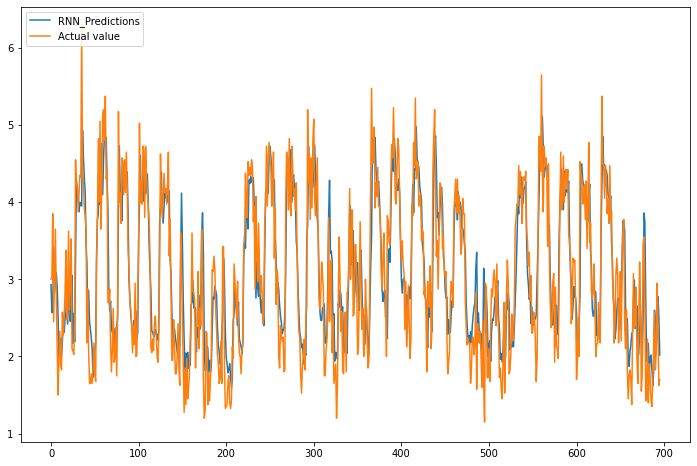

In [ ]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([3.]), array([2.9315693], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.06843066]), array([0.45690703]), array([1.15906811]), array([-0.96559238]), array([0.19896936]), array([0.68463731]), array([-0.3126061]), array([-0.81290793]), array([-1.05345225]), array([-0.03896427]), array([0.18168116]), array([-0.33355057]), array([-0.17263961]), array([0.37690115]), array([-0.23713875]), array([0.19015884]), array([0.35261321]), array([0.80209136]), array([-0.51833987]), array([0.40581012]), array([0.85061693]), array([-0.51098847]), array([0.57009482]), array([0.70698953]), array([-0.95210695]), array([-0.09406257]), array([-0.53292322]), array([0.23513651]), array([1.25652242]), array([-0.05764151]), array([0.13239813]), array([-0.23190165]), array([0.24813461]), array([0.35350108]), array([0.35686827]), array([2.32418084]), array([-0.52989483]), array([-0.31642199]), array([-0.39864302]), array([-0.31689477]), array([0.18577814]), array([-1.03620911]), array([0.42773366]), array([-0.8068037]), array([-0.79952025]), array([-0.69394219]), array([-0.46

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.32418084]), array([-1.83385348]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(370, 326)